In [39]:
import os
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Train Data

In [40]:
# Đường dẫn đến thư mục chứa dữ liệu
data_train_dir = "../Data/Acc/Datatrain"


# Xác định các đặc trưng (features) và nhãn (labels)
features = ["Ax", "Ay", "Az"]

# Chuẩn bị dữ liệu huấn luyện
train_data = []
train_labels = []

# Đọc dữ liệu từ thư mục Data_processing
for file_name in os.listdir(data_train_dir):
    if file_name.endswith("_0.csv"):
        label = 0  # Nhãn normal
    elif file_name.endswith("_1.csv"):
        label = 1  # Nhãn game
    else:
        continue

    file_path = os.path.join(data_train_dir, file_name)
    df = pd.read_csv(file_path)
    flattened_data = df[features].values.flatten()  # Chuyển đổi dữ liệu thành 2 chiều
    flattened_data = np.nan_to_num(flattened_data, nan=0.0, posinf=1.7976931348623157e+308, neginf=2.2250738585072014e-308)
    train_data.append(flattened_data)
    train_labels.append(label)

# Xây dựng mô hình 

# linear
linear_model = SVC(kernel='linear')
linear_model.fit(train_data, train_labels)

#poly
poly_model = SVC(kernel='poly')
poly_model.fit(train_data, train_labels)

#rbf
rbf_model = SVC(kernel='rbf')
rbf_model.fit(train_data, train_labels)

#sigmoid
sigmoid_model = SVC(kernel='sigmoid')
sigmoid_model.fit(train_data, train_labels)

#RF
rf_model = RandomForestClassifier()
rf_model.fit(train_data, train_labels)

RandomForestClassifier()

# Test Data

In [41]:
test_path = "../Data/Acc/Datatest"

test_data = []
test_filenames = []
test_labels = []

# Duyệt qua các tệp tin trong thư mục test_path
for filename in os.listdir(test_path):
    # Kiểm tra nếu tệp tin có đuôi .csv
    if filename.endswith(".csv"):
        file_path = os.path.join(test_path, filename)
        df = pd.read_csv(file_path)
        
        # Lấy dữ liệu từ 6 cột Ax, Ay, Az, Gx, Gy, Gz
        features = df[['Ax', 'Ay', 'Az']].values
        features = np.nan_to_num(features, nan=0.0, posinf=1.7976931348623157e+308, neginf=2.2250738585072014e-308)
        test_data.append(features)  # Thêm dữ liệu vào test_data
        test_filenames.append(filename)  # Thêm tên tệp tin vào test_filenames
        test_labels.append(0 if filename.endswith("_0.csv") else 1)  # Thêm nhãn vào test_labels (0: nữ, 1: nam)

test_data = np.array(test_data).reshape(len(test_data), -1)  # Chuyển đổi test_data thành mảng numpy 2D

# Linear

In [42]:
predictions = linear_model.predict(test_data)  # Dự đoán giới tính trên dữ liệu kiểm tra

# In kết quả dự đoán và tên tệp tin tương ứng
for filename, label, prediction in zip(test_filenames, test_labels, predictions):
    print("File:", filename)
    print("Dự đoán giới tính:", prediction)
    print("--------------------")

accuracy = accuracy_score(test_labels, predictions)  # Tính độ chính xác bằng cách so sánh nhãn thực tế và nhãn dự đoán
print("Độ chính xác của mô hình linear trên dữ liệu kiểm tra: {:.2f}%".format(accuracy * 100))

File: T0_ID00000053_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000054_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000055_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000056_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000057_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000058_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000059_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000060_Walk_0.csv
Dự đoán giới tính: 1
--------------------
File: T0_ID00000061_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000063_Walk_0.csv
Dự đoán giới tính: 1
--------------------
File: T0_ID00000064_Walk_0.csv
Dự đoán giới tính: 1
--------------------
File: T0_ID00000065_Walk_0.csv
Dự đoán giới tính: 1
--------------------
File: T0_ID00000065_Walk_1.csv
Dự đoán giới tính: 1
--------------------
File: T0_ID00000066_Walk_0.csv
Dự đoán giới tính: 1

# Poly

In [43]:
predictions = poly_model.predict(test_data)  # Dự đoán giới tính trên dữ liệu kiểm tra

# In kết quả dự đoán và tên tệp tin tương ứng
for filename, label, prediction in zip(test_filenames, test_labels, predictions):
    print("File:", filename)
    print("Dự đoán giới tính:", prediction)
    print("--------------------")

accuracy = accuracy_score(test_labels, predictions)  # Tính độ chính xác bằng cách so sánh nhãn thực tế và nhãn dự đoán
print("Độ chính xác của mô hình Poly trên dữ liệu kiểm tra: {:.2f}%".format(accuracy * 100))

File: T0_ID00000053_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000054_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000055_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000056_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000057_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000058_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000059_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000060_Walk_0.csv
Dự đoán giới tính: 1
--------------------
File: T0_ID00000061_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000063_Walk_0.csv
Dự đoán giới tính: 1
--------------------
File: T0_ID00000064_Walk_0.csv
Dự đoán giới tính: 1
--------------------
File: T0_ID00000065_Walk_0.csv
Dự đoán giới tính: 1
--------------------
File: T0_ID00000065_Walk_1.csv
Dự đoán giới tính: 1
--------------------
File: T0_ID00000066_Walk_0.csv
Dự đoán giới tính: 1

# RBF

In [44]:
predictions = rbf_model.predict(test_data)  # Dự đoán giới tính trên dữ liệu kiểm tra

# In kết quả dự đoán và tên tệp tin tương ứng
for filename, label, prediction in zip(test_filenames, test_labels, predictions):
    print("File:", filename)
    print("Dự đoán giới tính:", prediction)
    print("--------------------")

accuracy = accuracy_score(test_labels, predictions)  # Tính độ chính xác bằng cách so sánh nhãn thực tế và nhãn dự đoán
print("Độ chính xác của mô hình Rbf trên dữ liệu kiểm tra: {:.2f}%".format(accuracy * 100))

File: T0_ID00000053_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000054_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000055_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000056_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000057_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000058_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000059_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000060_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000061_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000063_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000064_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000065_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000065_Walk_1.csv
Dự đoán giới tính: 1
--------------------
File: T0_ID00000066_Walk_0.csv
Dự đoán giới tính: 0

# Sigmoid

In [45]:
predictions = sigmoid_model.predict(test_data)  # Dự đoán giới tính trên dữ liệu kiểm tra

# In kết quả dự đoán và tên tệp tin tương ứng
for filename, label, prediction in zip(test_filenames, test_labels, predictions):
    print("File:", filename)
    print("Dự đoán giới tính:", prediction)
    print("--------------------")

accuracy = accuracy_score(test_labels, predictions)  # Tính độ chính xác bằng cách so sánh nhãn thực tế và nhãn dự đoán
print("Độ chính xác của mô hình Sigmoid trên dữ liệu kiểm tra: {:.2f}%".format(accuracy * 100))

File: T0_ID00000053_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000054_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000055_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000056_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000057_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000058_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000059_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000060_Walk_0.csv
Dự đoán giới tính: 1
--------------------
File: T0_ID00000061_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000063_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000064_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000065_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000065_Walk_1.csv
Dự đoán giới tính: 1
--------------------
File: T0_ID00000066_Walk_0.csv
Dự đoán giới tính: 0

# Random Forest

In [46]:
predictions = rf_model.predict(test_data)  # Dự đoán giới tính trên dữ liệu kiểm tra

# In kết quả dự đoán và tên tệp tin tương ứng
for filename, label, prediction in zip(test_filenames, test_labels, predictions):
    print("File:", filename)
    print("Dự đoán giới tính:", prediction)
    print("--------------------")

accuracy = accuracy_score(test_labels, predictions)  # Tính độ chính xác bằng cách so sánh nhãn thực tế và nhãn dự đoán
print("Độ chính xác của mô hình Random Forest trên dữ liệu kiểm tra: {:.2f}%".format(accuracy * 100))

File: T0_ID00000053_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000054_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000055_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000056_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000057_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000058_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000059_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000060_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000061_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000063_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000064_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000065_Walk_0.csv
Dự đoán giới tính: 0
--------------------
File: T0_ID00000065_Walk_1.csv
Dự đoán giới tính: 1
--------------------
File: T0_ID00000066_Walk_0.csv
Dự đoán giới tính: 0

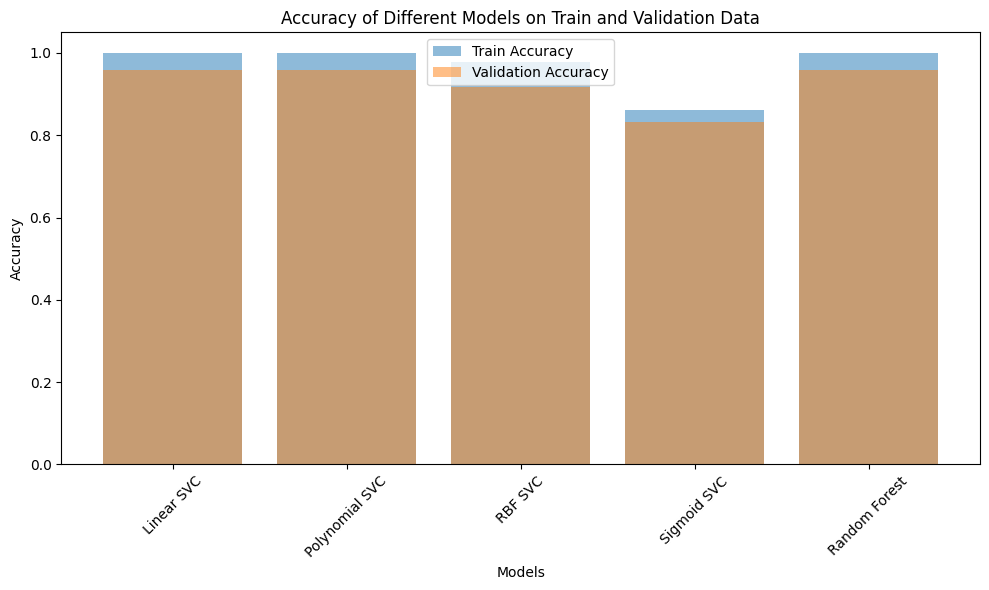

In [47]:

# Split data into train and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

models = [linear_model, poly_model, rbf_model, sigmoid_model, rf_model]
model_names = ['Linear SVC', 'Polynomial SVC', 'RBF SVC', 'Sigmoid SVC', 'Random Forest']

train_accuracies = []
val_accuracies = []

for model in models:
    model.fit(train_data, train_labels)
    train_acc = model.score(train_data, train_labels)
    val_acc = model.score(val_data, val_labels)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

plt.figure(figsize=(10, 6))
plt.bar(model_names, train_accuracies, alpha=0.5, label='Train Accuracy')
plt.bar(model_names, val_accuracies, alpha=0.5, label='Validation Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models on Train and Validation Data')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()